In [1]:
pip install scikit-learn==1.3.2

   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ----------------- ---------------------- 3.9/9.1 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 9.1/9.1 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import re
from sklearn.ensemble import RandomForestRegressor
import joblib

In [6]:
# CSV 파일 로드
df_ingredients = pd.read_csv('../data/raw/ingredients.csv')
df_ingredient_features = pd.read_csv("../data/final/ingredient_features.csv", index_col=0, encoding="utf-8")
df_ingredient_features_eng = pd.read_csv("../data/final/ingredient_features_eng.csv", index_col=0, encoding="utf-8")
df_drinks = pd.read_csv("../data/final/drinks_flavor_balanced.csv", encoding="cp949") # 칵테일 이름과 점수 정보를 담은 파일

In [7]:
df_drinks

,id,name,abv,sweetness,sourness,bitterness,body,herbal,coffee,fruity,citrus,creamy,berry,tropical,sweet,smoky,spicy,nutty,plain
0,1,A Day at the Beach,15,7,3,2,4,0,0,7,3,0,0,0,8,0,0,0,0
1,2,A True Amaretto Sour,20,8,7,2,4,0,0,5,2,0,0,0,9,0,0,8,0
2,3,A1,25,6,3,2,5,0,0,6,2,0,0,0,0,0,0,0,8
3,4,Abbey Cocktail,25,5,3,4,4,0,0,4,2,0,0,0,0,0,0,0,8
4,5,Abbey Martini,35,3,1,4,5,3,0,1,1,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,258,Wine Cooler,10,7,3,1,2,0,0,5,5,0,0,0,8,0,0,0,0
258,259,Wine Punch,12,8,2,1,3,0,0,7,6,0,0,0,9,0,0,0,0
259,260,Winter Rita,14,6,6,1,3,0,0,5,7,0,0,0,0,0,0,0,0
260,261,Yellow Bird,25,4,2,2,4,1,0,5,4,0,0,0,0,0,0,0,0


In [8]:
df_ingredients

,id,ingredient_name
0,1,1 oz rum
1,1,0.5 oz Almond Liqueur
2,1,4 oz Orange juice
3,1,Simple Syrup
4,2,1 oz Almond Liqueur
...,...,...
966,261,1.5 cl Lime Juice
967,262,5 cl Orange Liqueur
968,262,2 cl Lemon juice
969,262,ice


In [9]:
df_ingredient_features

,abv,sweetness,sourness,bitterness,body,herbal,coffee,fruity,citrus,creamy,berry,tropical,sweet,smoky,spicy,nutty,plain
ingredients,,,,,,,,,,,,,,,,,
진,40,0,0,2,4,9,0,0,1,0,0,0,0,0,0,0,4
럼,40,1,0,1,4,0,0,2,0,0,0,4,4,0,0,0,4
보드카,40,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,10
위스키,40,1,0,3,6,2,1,0,0,0,0,0,0,8,4,5,0
브랜디,40,2,0,1,5,1,0,2,0,0,0,0,0,6,3,6,0
데킬라,40,0,1,2,4,2,0,0,1,0,0,0,0,3,8,0,0
압생트,40,1,0,4,5,9,0,0,0,0,0,0,0,0,0,0,0
문샤인,45,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,7
오렌지 리큐르,30,8,1,2,3,1,0,8,6,0,0,0,7,0,0,0,0


In [10]:
df_ingredient_features_eng.loc['port_wine'] = {
    'abv': 20,
    'sweetness': 7,
    'sourness': 1,
    'bitterness': 1,
    'body': 5,
    'herbal': 1,
    'coffee': 0,
    'fruity': 8,
    'citrus': 1,
    'creamy': 0,
    'berry': 9,
    'tropical': 0,
    'sweet': 9,
    'smoky': 0,
    'spicy': 2,
    'nutty': 1,
    'plain': 3
}

df_ingredient_features_eng

,abv,sweetness,sourness,bitterness,body,herbal,coffee,fruity,citrus,creamy,berry,tropical,sweet,smoky,spicy,nutty,plain
ingredients,,,,,,,,,,,,,,,,,
gin,40,0,0,2,4,9,0,0,1,0,0,0,0,0,0,0,4
rum,40,1,0,1,4,0,0,2,0,0,0,4,4,0,0,0,4
vodka,40,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,10
whiskey,40,1,0,3,6,2,1,0,0,0,0,0,0,8,4,5,0
brandy,40,2,0,1,5,1,0,2,0,0,0,0,0,6,3,6,0
tequila,40,0,1,2,4,2,0,0,1,0,0,0,0,3,8,0,0
absinthe,40,1,0,4,5,9,0,0,0,0,0,0,0,0,0,0,0
moonshine,45,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,7
orange_liqueur,30,8,1,2,3,1,0,8,6,0,0,0,7,0,0,0,0


In [11]:
def convert_to_ml(amount_str):
    if not amount_str or pd.isna(amount_str) or amount_str == "":
        return 5  # 양이 명시되지 않은 경우 기본값
    
    # "Fill", "Top", "Filled" 등의 표현이 있으면 큰 양으로 처리
    if re.search(r'fill|top|full', str(amount_str).lower()):
        return 60  # filling은 60ml로 가정
    
    # 숫자 추출 (분수 포함)
    amount_match = re.search(r'(\d+(?:\.\d+)?|\d+/\d+)', str(amount_str))
    if not amount_match:
        return 5  # 숫자가 없는 경우 기본값
    
    amount_val = amount_match.group(1)
    # 분수 처리 (1/2 -> 0.5)
    if '/' in amount_val:
        num, denom = amount_val.split('/')
        amount_num = float(num) / float(denom)
    else:
        amount_num = float(amount_val)
    
    # 단위에 따른 변환
    amount_str_lower = str(amount_str).lower()
    if 'oz' in amount_str_lower:
        return amount_num * 30  # 1 oz = 30 ml
    elif 'dash' in amount_str_lower:
        return amount_num * 5   # 1 dash = 5 ml
    elif 'shot' in amount_str_lower:
        return amount_num * 45  # 1 shot = 45 ml
    elif 'jigger' in amount_str_lower:
        return amount_num * 45  # 1 jigger = 45 ml
    elif 'tsp' in amount_str_lower:
        return amount_num * 5   # 1 tsp = 5 ml
    elif 'tblsp' in amount_str_lower or 'tbsp' in amount_str_lower:
        return amount_num * 15  # 1 tablespoon = 15 ml
    elif 'part' in amount_str_lower:
        return amount_num * 30  # 1 part = 30 ml (상대적 비율)
    elif 'cl' in amount_str_lower:
        return amount_num * 10  # 1 cl = 10 ml
    elif 'ml' in amount_str_lower:
        return amount_num  # 이미 ml 단위일 경우 그대로 사용
    else:
        return amount_num * 30  # 기본값으로 30ml 가정

In [12]:
# 재료량과 재료이름 분리하기 위한 개선된 함수
def extract_amount_and_ingredient(ingredient_text):
    if pd.isna(ingredient_text):
        return "", ""
    
    # "Juice of 1/2 Lemon"과 같은 특수 케이스 처리
    juice_match = re.match(r'juice\s+of\s+(.+?)\s+(.+)', ingredient_text.lower())
    if juice_match:
        amount = juice_match.group(1)
        ingredient = juice_match.group(2)
        # "juice of 1/2 lemon" -> 양: "1/2", 재료: "lemon juice"
        if ingredient.lower() in ['lemon', 'lime', 'orange']:
            return amount, f"{ingredient} juice"
        return amount, ingredient
    
    # 일반적인 패턴: "1 oz Rum", "1/2 shot Gin" 등
    pattern = r'^((?:[\d./]+)?\s*(?:oz|shot|tsp|tblsp|tbsp|dash|jigger|part|fill|cl|ml|top|can)?\s*(?:of)?)\s*(.+)$'
    match = re.match(pattern, ingredient_text.strip(), re.IGNORECASE)
    
    if match:
        amount = match.group(1).strip()
        ingredient = match.group(2).strip()
        # 양이 비어있으면 빈 문자열 반환
        if amount == "":
            return "", ingredient
        return amount, ingredient
    else:
        # 매칭되지 않으면 전체를 재료명으로 간주
        return "", ingredient_text.strip()

In [13]:
# 매핑 불가한 재료만
special_ingredients = ['ice', 'salt', 'olive_garnish']

# 기본 양
special_amounts = {
    'ice': 100,
    'salt': 2,
    'olive_garnish': 5
}

In [14]:
ingredient_mapping = {}

ingredient_mapping = {
    # 기본 한글 → 영어 재료
    '진': 'gin',
    '럼': 'rum',
    '보드카': 'vodka',
    '위스키': 'whiskey',
    '브랜디': 'brandy',
    '데킬라': 'tequila',
    '압생트': 'absinthe',
    '문샤인': 'moonshine',
    '오렌지 리큐르': 'orange_liqueur',
    '블루 큐라소': 'blue_curacao',
    '오렌지 주스': 'orange_juice',
    '라임 주스': 'lime_juice',
    '레몬 주스': 'lemon_juice',
    '체리 리큐르': 'cherry_liqueur',
    '크랜베리 주스': 'cranberry_juice',
    '파인애플 주스': 'pineapple_juice',
    '아몬드 리큐르': 'almond_liqueur',
    '심플 시럽': 'simple_syrup',
    '커피 리큐르': 'coffee_liqueur',
    '허브 리큐르': 'herbal_liqueur',
    '드라이 베르무트': 'dry_vermouth',
    '스위트 베르무트': 'sweet_vermouth',
    '비터스': 'bitters',
    '우유': 'milk',
    '탄산수': 'soda',
    '그레나딘 시럽': 'grenadine_syrup',

    # 가니시
    '레몬 필': 'lemon_peel',
    '레몬 웨지': 'lemon_wedge',
    '레몬 슬라이스': 'lemon_slice',
    '라임 필': 'lime_peel',
    '라임 웨지': 'lime_wedge',
    '라임 슬라이스': 'lime_slice',
    '오렌지 필': 'orange_peel',
    '오렌지 웨지': 'orange_wedge',
    '오렌지 슬라이스': 'orange_slice',
    '체리': 'cherry',
    '애플민트': 'apple_mint',

    # 오염, 파생, 변형된 이름
    'mint_leaves': 'apple_mint',
    'mint_garnish': 'apple_mint',
    'orange_garnish': 'orange_peel',
    'lime_garnish': 'lime_peel',
    'cherry_garnish': 'cherry',
    'water': 'soda',
    'salt': 'salt',
    'olive_garnish': 'olive_garnish',
    'lemon': 'lemon_juice',
    'maraschino_cherry': 'cherry',
    'with__orange_juice': 'orange_juice',
    'lime': 'lime_juice',
    'slice_lemon_peel': 'lemon_peel',
    'lemon_pill': 'lemon_peel',
    'slice__lemon': 'lemon_slice',
    'cherry_brandy': 'cherry_liqueur',
    'dry__pot_wine': 'port_wine',
    'pot_wine': 'port_wine',
    'fresh_lime_juice': 'lime_juice',
    'garnish_lime': 'lime_peel',
    'garnish_mint': 'apple_mint',
    'lemon_garnish': 'lemon_peel',
    'lemon_vodka': 'vodka',
    'mint': 'apple_mint',
    'mint_syrup': 'simple_syrup',
    'orange': 'orange_juice',
    'orange_pill': 'orange_peel',
    'red__sweet_vermouth': 'sweet_vermouth',
    'slice__lime': 'lime_slice',
    'slice__orange': 'orange_slice',
    'twist_of_lemon_peel': 'lemon_peel',
    'twist_of_orange_peel': 'orange_peel',
    'up_with_soda': 'soda',
    'vermouth': 'dry_vermouth',
    'wedge_lemon': 'lemon_wedge',
    'whole__milk': 'milk',
    'with__soda': 'soda'
}

In [15]:
ingredient_mapping

{'진': 'gin',
 '럼': 'rum',
 '보드카': 'vodka',
 '위스키': 'whiskey',
 '브랜디': 'brandy',
 '데킬라': 'tequila',
 '압생트': 'absinthe',
 '문샤인': 'moonshine',
 '오렌지 리큐르': 'orange_liqueur',
 '블루 큐라소': 'blue_curacao',
 '오렌지 주스': 'orange_juice',
 '라임 주스': 'lime_juice',
 '레몬 주스': 'lemon_juice',
 '체리 리큐르': 'cherry_liqueur',
 '크랜베리 주스': 'cranberry_juice',
 '파인애플 주스': 'pineapple_juice',
 '아몬드 리큐르': 'almond_liqueur',
 '심플 시럽': 'simple_syrup',
 '커피 리큐르': 'coffee_liqueur',
 '허브 리큐르': 'herbal_liqueur',
 '드라이 베르무트': 'dry_vermouth',
 '스위트 베르무트': 'sweet_vermouth',
 '비터스': 'bitters',
 '우유': 'milk',
 '탄산수': 'soda',
 '그레나딘 시럽': 'grenadine_syrup',
 '레몬 필': 'lemon_peel',
 '레몬 웨지': 'lemon_wedge',
 '레몬 슬라이스': 'lemon_slice',
 '라임 필': 'lime_peel',
 '라임 웨지': 'lime_wedge',
 '라임 슬라이스': 'lime_slice',
 '오렌지 필': 'orange_peel',
 '오렌지 웨지': 'orange_wedge',
 '오렌지 슬라이스': 'orange_slice',
 '체리': 'cherry',
 '애플민트': 'apple_mint',
 'mint_leaves': 'apple_mint',
 'mint_garnish': 'apple_mint',
 'orange_garnish': 'orange_peel',
 'lime_garnish': '

In [16]:
# 오염된 이름 처리용 전처리 함수 추가
def clean_ingredient_name(name):
    name = name.lower().strip()
    name = re.sub(r'[^a-z _]+', '', name)  # 특수기호 제거
    name = name.replace(' ', '_')          # 공백을 언더스코어로 변환
    name = re.sub(r'^(s__|es__|garnish_with_|twist_of__|to_top_with__|/4__|wedge__|bottle__|up__|measures__|package__|l__|l_|s_|es_|fresh__|handful__)', '', name)
    name = re.sub(r'_+$', '', name)
    return name

# 재료 표준화 함수 수정
def standardize_ingredient(ingredient):
    if pd.isna(ingredient):
        return ""
    
    # 이름 전처리 → 매핑 시도
    cleaned = clean_ingredient_name(ingredient)
    
    # 매핑 우선
    if cleaned in ingredient_mapping:
        return ingredient_mapping[cleaned]
    
    # 그 외는 cleaned 그대로 사용 (예: 'lemon' → 'lemon')
    return cleaned.replace(' ', '_')

# 새로운 칼럼 추가
df_ingredients[['amount_str', 'ingredient']] = df_ingredients['ingredient_name'].apply(
    lambda x: pd.Series(extract_amount_and_ingredient(x))
)

# 재료 표준화 적용
df_ingredients['std_ingredient'] = df_ingredients['ingredient'].apply(standardize_ingredient)

# 재료량을 ml로 변환
df_ingredients['amount_ml'] = df_ingredients['amount_str'].apply(convert_to_ml)

# 특별 재료의 경우 기본 양 적용
for i, row in df_ingredients.iterrows():
    if row['std_ingredient'] in special_ingredients:
        # 이미 양이 지정되어 있으면 그대로 사용, 아니면 기본값 사용
        if pd.isna(row['amount_str']) or row['amount_str'] == "":
            df_ingredients.at[i, 'amount_ml'] = special_amounts[row['std_ingredient']]

In [17]:
df_ingredients

,id,ingredient_name,amount_str,ingredient,std_ingredient,amount_ml
0,1,1 oz rum,1 oz,rum,rum,30.0
1,1,0.5 oz Almond Liqueur,0.5 oz,Almond Liqueur,almond_liqueur,15.0
2,1,4 oz Orange juice,4 oz,Orange juice,orange_juice,120.0
3,1,Simple Syrup,,Simple Syrup,simple_syrup,5.0
4,2,1 oz Almond Liqueur,1 oz,Almond Liqueur,almond_liqueur,30.0
...,...,...,...,...,...,...
966,261,1.5 cl Lime Juice,1.5 cl,Lime Juice,lime_juice,15.0
967,262,5 cl Orange Liqueur,5 cl,Orange Liqueur,orange_liqueur,50.0
968,262,2 cl Lemon juice,2 cl,Lemon juice,lemon_juice,20.0
969,262,ice,,ice,ice,100.0


In [18]:
# ID별로 그룹화하여 레시피 딕셔너리 생성
recipes = {}
for id_val, group in df_ingredients.groupby('id'):
    recipes[id_val] = {}
    for _, row in group.iterrows():
        std_ingredient = row['std_ingredient']
        if std_ingredient and std_ingredient != "":  # 빈 문자열 무시
            amount_ml = row['amount_ml']
            recipes[id_val][std_ingredient] = amount_ml

In [19]:
recipes

{1: {'rum': 30.0,
  'almond_liqueur': 15.0,
  'orange_juice': 120.0,
  'simple_syrup': 5.0},
 2: {'almond_liqueur': 30.0, 'lemon_juice': 5.0, 'ice': 100.0, 'cherry': 5.0},
 3: {'gin': 90.0,
  'orange_liqueur': 45.0,
  'lemon_juice': 11.25,
  'simple_syrup': 5.0},
 4: {'gin': 45.0, 'bitters': 5.0, 'orange_juice': 5.0, 'cherry': 5.0},
 5: {'gin': 90.0,
  'sweet_vermouth': 45.0,
  'orange_juice': 45.0,
  'bitters': 15.0},
 6: {'gin': 30.0, 'lime_juice': 15.0, 'ice': 100.0, 'soda': 5.0},
 7: {'rum': 45.0,
  'orange_liqueur': 7.5,
  'lime_juice': 15.0,
  'simple_syrup': 5.0,
  'milk': 5.0,
  'apple_mint': 5.0},
 8: {'gin': 90.0, 'simple_syrup': 5.0, 'milk': 67.5},
 9: {'rum': 30.0, 'whiskey': 30.0},
 10: {'rum': 60.0, 'lemon_juice': 30.0, 'simple_syrup': 5.0},
 13: {'sweet_vermouth': 90.0, 'dry_vermouth': 45.0, 'soda': 5.0},
 14: {'gin': 67.5, 'dry_vermouth': 67.5},
 15: {'vodka': 45.0, 'simple_syrup': 5.0, 'orange_juice': 60.0, 'rum': 45.0},
 16: {'dry_vermouth': 22.5,
  'brandy': 22.5,
  

In [20]:
for recipe_id, ingredients in list(recipes.items())[:3]:  # 처음 3개 레시피만 출력
    print(f"\n레시피 ID: {recipe_id}")
    for ingredient, amount in ingredients.items():
        print(f"  - {amount} ml {ingredient}")


레시피 ID: 1
  - 30.0 ml rum
  - 15.0 ml almond_liqueur
  - 120.0 ml orange_juice
  - 5.0 ml simple_syrup

레시피 ID: 2
  - 30.0 ml almond_liqueur
  - 5.0 ml lemon_juice
  - 100.0 ml ice
  - 5.0 ml cherry

레시피 ID: 3
  - 90.0 ml gin
  - 45.0 ml orange_liqueur
  - 11.25 ml lemon_juice
  - 5.0 ml simple_syrup


In [21]:
# 레시피를 특성 벡터로 변환하는 함수
def recipe_to_vector(recipe, ingredient_features):
    categories = ingredient_features.columns.tolist()
    cocktail_vector = np.zeros(len(categories))  # 벡터 초기화
    
    total_amount = 0
    missing_ingredients = []

    for ingredient, amount_ml in recipe.items():
        if ingredient in ingredient_features.index:  # 재료가 특성 데이터프레임에 있는지 확인
            cocktail_vector += ingredient_features.loc[ingredient].values * amount_ml
            total_amount += amount_ml
        else:
            missing_ingredients.append(ingredient)
    
    # 누락된 재료 보고
    if missing_ingredients:
        print(f"경고: 다음 재료가 특성 데이터프레임에 없습니다: {', '.join(missing_ingredients)}")
    
    # 총량으로 나누어 정규화
    if total_amount > 0:
        cocktail_vector /= total_amount
    else:
        print("경고: 총량이 0입니다. 벡터 값이 0으로 남을 수 있습니다.")
    
    return cocktail_vector

In [22]:
# 'drink.csv'에서 칵테일 특징 점수 로딩
drink_features = ['abv', 'sweetness', 'sourness', 'bitterness', 'body', 'herbal', 'coffee', 'fruity', 'citrus', 'creamy', 'berry', 'tropical', 'sweet', 'smoky', 'spicy', 'nutty', 'plain']

In [23]:
# 훈련 데이터 생성
X = []
y = []
valid_recipes = []

# df_drinks의 구조 확인
print("\n=== drinks_flavor_balanced.csv 구조 확인 ===")
print(f"df_drinks 열: {df_drinks.columns.tolist()}")


=== drinks_flavor_balanced.csv 구조 확인 ===
df_drinks 열: ['id', 'name', 'abv', 'sweetness', 'sourness', 'bitterness', 'body', 'herbal', 'coffee', 'fruity', 'citrus', 'creamy', 'berry', 'tropical', 'sweet', 'smoky', 'spicy', 'nutty', 'plain']


In [24]:
# 인덱스 설정 전에 열 확인
if 'name' not in df_drinks.columns:
    print("오류: 'drinks.csv'에 'name' 열이 없습니다.")
    # 첫 번째 열을 인덱스로 사용하려면:
    first_column = df_drinks.columns[0]
    print(f"첫 번째 열({first_column})을 인덱스로 사용합니다.")
    df_drinks.set_index(first_column, inplace=True)
else:
    df_drinks.set_index('name', inplace=True)

# 인덱스 설정 후 확인
print(f"인덱스 설정 후 drink_df 샘플:\n{df_drinks.head()}")

# drink_df에서 필요한 특성이 있는지 확인
missing_features = [feature for feature in drink_features if feature not in df_drinks.columns]
if missing_features:
    print(f"오류: drinks.csv에 다음 특성이 없습니다: {', '.join(missing_features)}")
    print(f"사용 가능한 열: {df_drinks.columns.tolist()}")

인덱스 설정 후 drink_df 샘플:
                      id  abv  sweetness  sourness  bitterness  body  herbal  \
name                                                                           
A Day at the Beach     1   15          7         3           2     4       0   
A True Amaretto Sour   2   20          8         7           2     4       0   
A1                     3   25          6         3           2     5       0   
Abbey Cocktail         4   25          5         3           4     4       0   
Abbey Martini          5   35          3         1           4     5       3   

                      coffee  fruity  citrus  creamy  berry  tropical  sweet  \
name                                                                           
A Day at the Beach         0       7       3       0      0         0      8   
A True Amaretto Sour       0       5       2       0      0         0      9   
A1                         0       6       2       0      0         0      0   
Abbey Cocktail   

In [111]:
df_drinks

,id,abv,sweetness,sourness,bitterness,body,herbal,coffee,fruity,citrus,creamy,berry,tropical,sweet,smoky,spicy,nutty,plain
name,,,,,,,,,,,,,,,,,,
A Day at the Beach,1,15,7,3,2,4,0,0,7,3,0,0,0,8,0,0,0,0
A True Amaretto Sour,2,20,8,7,2,4,0,0,5,2,0,0,0,9,0,0,8,0
A1,3,25,6,3,2,5,0,0,6,2,0,0,0,0,0,0,0,8
Abbey Cocktail,4,25,5,3,4,4,0,0,4,2,0,0,0,0,0,0,0,8
Abbey Martini,5,35,3,1,4,5,3,0,1,1,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wine Cooler,258,10,7,3,1,2,0,0,5,5,0,0,0,8,0,0,0,0
Wine Punch,259,12,8,2,1,3,0,0,7,6,0,0,0,9,0,0,0,0
Winter Rita,260,14,6,6,1,3,0,0,5,7,0,0,0,0,0,0,0,0


In [25]:
for recipe_id, recipe in recipes.items():
    if not recipe:
        continue

    # 레시피는 원래 영어 재료명 기반이므로 바로 사용
    vector = recipe_to_vector(recipe, df_ingredient_features_eng)

    if np.sum(vector) > 0:
        X.append(vector)

        if recipe_id in df_drinks['id'].values:
            try:
                feature_values = df_drinks[df_drinks['id'] == recipe_id][drink_features].values[0]
                y.append(feature_values)
                valid_recipes.append(recipe_id)
                print(f"레시피 ID {recipe_id} 추가됨: {feature_values}")
            except KeyError as e:
                print(f"KeyError: {recipe_id}의 특성 점수를 추출하는 중 오류 발생: {e}")
        else:
            print(f"레시피 ID {recipe_id}를 drinks.csv에서 찾을 수 없음 ({recipe_id})")

레시피 ID 1 추가됨: [15  7  3  2  4  0  0  7  3  0  0  0  8  0  0  0  0]
경고: 다음 재료가 특성 데이터프레임에 없습니다: ice
레시피 ID 2 추가됨: [20  8  7  2  4  0  0  5  2  0  0  0  9  0  0  8  0]
레시피 ID 3 추가됨: [25  6  3  2  5  0  0  6  2  0  0  0  0  0  0  0  8]
레시피 ID 4 추가됨: [25  5  3  4  4  0  0  4  2  0  0  0  0  0  0  0  8]
레시피 ID 5 추가됨: [35  3  1  4  5  3  0  1  1  0  0  0  0  0  0  0  8]
경고: 다음 재료가 특성 데이터프레임에 없습니다: ice
레시피 ID 6 추가됨: [40  5  2  1  6  0  0  6  1  0  0  0  0  0  0  0  8]
레시피 ID 7 추가됨: [20  6  4  2  5  1  0  7  3  0  0  0  0  0  0  0  0]
레시피 ID 8 추가됨: [30  7  2  1  5  0  0  6  3  0  0  0  8  0  0  0  0]
레시피 ID 9 추가됨: [40  4 10  0  4  0  0  6  7  0  0  0  0  0  0  0  0]
레시피 ID 10 추가됨: [30  7  2  1  5  0  0  7  3  0  0  0  8  0  0  0  0]
레시피 ID 13 추가됨: [25  6  3  3  5  0  0  4  3  0  0  0  0  0  0  0  0]
레시피 ID 14 추가됨: [25  7  3  2  5  0  0  6  3  0  0  0  8  0  0  0  0]
레시피 ID 15 추가됨: [30  7  2  2  5  1  0  6  3  0  0  0  8  0  0  0  0]
레시피 ID 16 추가됨: [35  7  6  3  5  0  0  6  4  0  0  0  8  0  0 

In [26]:
# 훈련 데이터 확인
X = np.array(X)
y = np.array(y)

In [27]:
print(f"\n훈련 데이터 크기: {X.shape}, {y.shape}")


훈련 데이터 크기: (251, 17), (251, 17)



--- Random Forest Regressor ---
RMSE: 1.90
R² Score: 0.11041


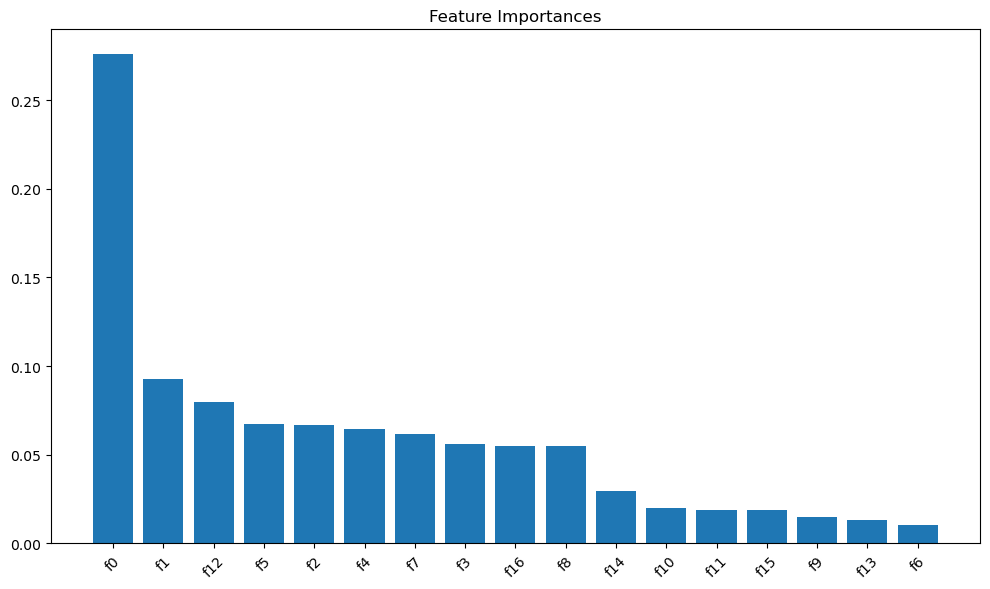

모델 저장됨: cocktail_quality_predictor.pkl


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 샘플 데이터 존재 여부 확인
if len(X) == 0 or len(y) == 0:
    print("오류: 훈련 데이터가 없습니다. 데이터 불러오기와 전처리를 확인하세요.")
else:
    # 데이터셋 분할
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 모델 정의 및 훈련
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # 예측 수행
    y_pred = rf_model.predict(X_test)

    # 결과 출력
    print("\n--- Random Forest Regressor ---")
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.5f}")

    # 특성 중요도 시각화
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [f"f{i}" for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()

    # 모델 저장
    joblib.dump(rf_model, 'cocktail_quality_predictor.pkl')
    print("모델 저장됨: cocktail_quality_predictor.pkl")

In [97]:
class CocktailPredictor:
    def __init__(self, model, ingredient_features):
        self.model = model
        self.ingredient_features = ingredient_features  # ✅ DataFrame!
        self.feature_names = ingredient_features.columns.tolist()
        self.ingredient_mapping = ingredient_mapping
        self.special_amounts = special_amounts
        self.special_ingredients = special_ingredients

    def parse_ingredient_input(self, ingredient_str):
        amount_str, ingredient = extract_amount_and_ingredient(ingredient_str)
        std_ingredient = standardize_ingredient(ingredient)
        amount_ml = convert_to_ml(amount_str)
        if std_ingredient in self.special_ingredients and (not amount_str or amount_str == ""):
            amount_ml = self.special_amounts[std_ingredient]
        return std_ingredient, amount_ml

    def parse_recipe_input(self, recipe_str):
        recipe = {}
        if '\n' in recipe_str:
            ingredients_list = recipe_str.strip().split('\n')
        else:
            ingredients_list = recipe_str.strip().split(',')

        for ingredient_str in ingredients_list:
            ingredient_str = ingredient_str.strip()
            if ingredient_str:
                std_ingredient, amount_ml = self.parse_ingredient_input(ingredient_str)
                if std_ingredient and std_ingredient != "":
                    recipe[std_ingredient] = amount_ml

        return recipe

    def recipe_to_vector(self, recipe):
        vector = np.zeros(len(self.feature_names))
        total_amount = 0
        missing_ingredients = []

        for ingredient, amount in recipe.items():
            if ingredient in self.ingredient_features.index:
                vector += self.ingredient_features.loc[ingredient].values * amount
                total_amount += amount
            else:
                missing_ingredients.append(ingredient)

        if missing_ingredients:
            print(f"⚠️ 누락된 재료: {', '.join(missing_ingredients)}")
        if total_amount > 0:
            vector /= total_amount
        else:
            print("⚠️ 총량이 0입니다.")

        return vector

    def predict_cocktail(self, recipe_input):
        if isinstance(recipe_input, str):
            recipe = self.parse_recipe_input(recipe_input)
        else:
            recipe = recipe_input

        if not recipe:
            return {"error": "유효한 재료가 입력되지 않았습니다."}

        print("\n입력된 레시피:")
        for ingredient, amount in recipe.items():
            print(f"  - {amount} ml {ingredient}")

        vector = self.recipe_to_vector(recipe)
        print(f"\n변환된 벡터: {vector}")

        try:
            prediction = self.model.predict([vector])[0]
            print(f"원시 예측 값: {prediction}")
        except Exception as e:
            print(f"예측 중 오류 발생: {e}")
            return {"error": "예측 중 오류가 발생했습니다."}

        result = {}
        for i, feature_name in enumerate(self.feature_names):
            score = min(max(prediction[i], 0), 10)
            result[feature_name] = round(score, 1)

        taste_keys = ['sweetness', 'sourness', 'bitterness']
        flavor_keys = [
            'herbal', 'coffee', 'fruity', 'citrus', 'creamy',
            'berry', 'tropical', 'sweet', 'smoky', 'spicy', 'nutty', 'plain'
        ]

        taste_scores = {key: int(round(result.get(key, 0) * 0.5)) for key in taste_keys}
        flavor_scores = {key: result.get(key, 0) for key in flavor_keys}

        top_flavors = sorted(flavor_scores.items(), key=lambda x: x[1], reverse=True)[:2]
        flavorNotes = [flavor.title().replace('_', '') for flavor, _ in top_flavors]

        return {
            "flavor_profile": {
                "sweetness": taste_scores["sweetness"],
                "sourness": taste_scores["sourness"],
                "bitterness": taste_scores["bitterness"],
                "flavorNotes": flavorNotes
            }
        }

In [99]:
predictor = CocktailPredictor(rf_model, df_ingredient_features_eng)

In [101]:
recipe

'\n        45.0 ml rum\n        30.0 ml pineapple_juice\n        15.0 ml lime_juice\n        5.0 ml simple_syrup\n    '

In [103]:
result = predictor.predict_cocktail(recipe)


입력된 레시피:
  - 45.0 ml rum
  - 30.0 ml pineapple_juice
  - 15.0 ml lime_juice
  - 5.0 ml simple_syrup

변환된 벡터: [18.94736842  3.52631579  3.          0.47368421  2.73684211  0.
  0.          4.73684211  2.36842105  0.          0.          4.73684211
  5.10526316  0.          0.          0.          2.15789474]
원시 예측 값: [26.05  5.91  4.45  1.55  4.56  0.48  0.    6.11  4.83  0.    0.    0.08
  3.17  0.    0.    0.08  0.88]


In [105]:
result = predictor.predict_cocktail(recipe)

if isinstance(result, dict) and "flavor_profile" in result:
    profile = result["flavor_profile"]
    print("✅ 예측 성공")
    print("Sweetness:", profile["sweetness"])
    print("Sourness:", profile["sourness"])
    print("Bitterness:", profile["bitterness"])
    print("Top Flavors:", profile["flavorNotes"])
else:
    print("❌ 오류:", result)



입력된 레시피:
  - 45.0 ml rum
  - 30.0 ml pineapple_juice
  - 15.0 ml lime_juice
  - 5.0 ml simple_syrup

변환된 벡터: [18.94736842  3.52631579  3.          0.47368421  2.73684211  0.
  0.          4.73684211  2.36842105  0.          0.          4.73684211
  5.10526316  0.          0.          0.          2.15789474]
원시 예측 값: [26.05  5.91  4.45  1.55  4.56  0.48  0.    6.11  4.83  0.    0.    0.08
  3.17  0.    0.    0.08  0.88]
✅ 예측 성공
Sweetness: 3
Sourness: 2
Bitterness: 1
Top Flavors: ['Fruity', 'Citrus']


In [107]:
result

{'flavor_profile': {'sweetness': 3,
  'sourness': 2,
  'bitterness': 1,
  'flavorNotes': ['Fruity', 'Citrus']}}

In [109]:
test_recipes = {
    "달콤+시트러스": """
        45.0 ml orange_liqueur
        15.0 ml lemon_juice
        10.0 ml simple_syrup
        100.0 ml ice
    """,
    "씁쓸+드라이": """
        50.0 ml whiskey
        25.0 ml dry_vermouth
        10.0 ml bitters
        100.0 ml ice
    """,
    "트로피컬+새콤달콤": """
        45.0 ml rum
        30.0 ml pineapple_juice
        15.0 ml lime_juice
        5.0 ml simple_syrup
    """
}

for name, recipe in test_recipes.items():
    print(f"\n🌟 {name} 레시피 테스트 결과:")
    result = predictor.predict_cocktail(recipe)
    print(result)



🌟 달콤+시트러스 레시피 테스트 결과:

입력된 레시피:
  - 45.0 ml orange_liqueur
  - 15.0 ml lemon_juice
  - 10.0 ml simple_syrup
  - 100.0 ml ice
⚠️ 누락된 재료: ice

변환된 벡터: [19.28571429  7.21428571  2.57142857  1.28571429  2.28571429  0.64285714
  0.          6.21428571  6.          0.          0.          0.
  6.57142857  0.          0.          0.          0.71428571]
원시 예측 값: [18.99  6.59  4.36  0.99  3.91  0.27  0.    5.75  4.44  0.08  0.    0.
  5.53  0.    0.    0.64  0.24]
{'flavor_profile': {'sweetness': 3, 'sourness': 2, 'bitterness': 0, 'flavorNotes': ['Fruity', 'Sweet']}}

🌟 씁쓸+드라이 레시피 테스트 결과:

입력된 레시피:
  - 50.0 ml whiskey
  - 25.0 ml dry_vermouth
  - 10.0 ml bitters
  - 100.0 ml ice
⚠️ 누락된 재료: ice

변환된 벡터: [34.70588235  0.88235294  0.58823529  3.52941176  4.64705882  3.88235294
  0.58823529  0.58823529  0.29411765  0.          0.          0.
  0.          4.70588235  3.05882353  2.94117647  0.        ]
원시 예측 값: [38.628   3.6015  0.9175  4.737   6.743   1.9555  0.      2.6395  2.1285
  0.      0. 